In [2]:
import pandas as pd

features = pd.read_csv("../features.csv")
features.head()


,is_warn,is_info,msg_length,unique_components
0,5,95,93.37,5
1,4,96,94.14,5
2,3,97,92.40,4
3,2,98,89.93,5
4,4,96,91.04,4


In [3]:
from sklearn.preprocessing import StandardScaler

X = features.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_warn            2000 non-null   int64  
 1   is_info            2000 non-null   int64  
 2   msg_length         2000 non-null   float64
 3   unique_components  2000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 62.6 KB


In [6]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=200,
    contamination=0.03,
    random_state=42
)

model.fit(X_scaled)


,n_estimators,200
,max_samples,'auto'
,contamination,0.03
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [7]:
features["anomaly"] = model.predict(X_scaled)
features["score"] = model.decision_function(X_scaled)


In [8]:
features.head()

,is_warn,is_info,msg_length,unique_components,anomaly,score
0,5,95,93.37,5,1,0.198301
1,4,96,94.14,5,1,0.214991
2,3,97,92.40,4,1,0.186065
3,2,98,89.93,5,1,0.189956
4,4,96,91.04,4,1,0.148215


In [9]:
features["anomaly"].value_counts()


anomaly
 1    1941
-1      59
Name: count, dtype: int64

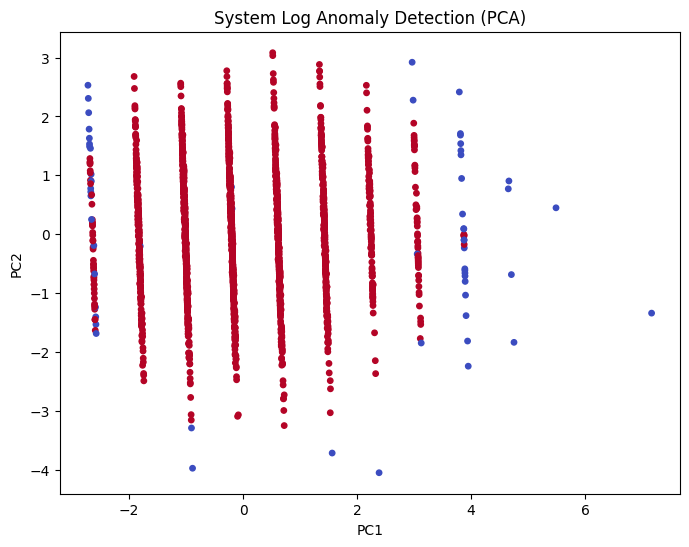

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=features["anomaly"],
    cmap="coolwarm",
    s=15
)
plt.title("System Log Anomaly Detection (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


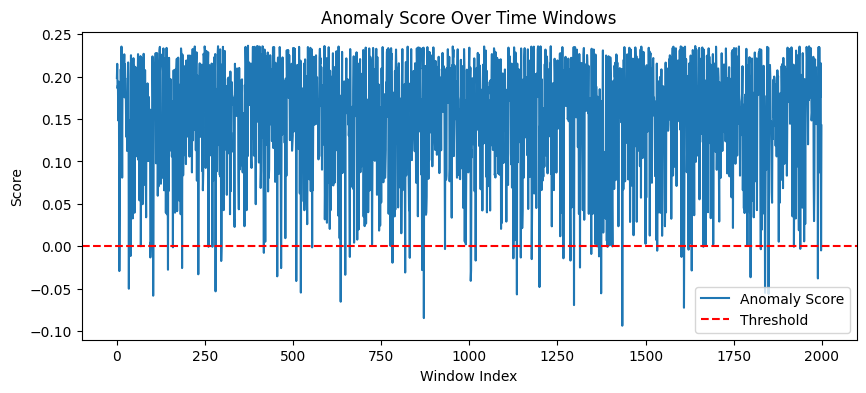

In [11]:
plt.figure(figsize=(10,4))
plt.plot(features.index, features["score"], label="Anomaly Score")

threshold = features["score"].quantile(0.03)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold")

plt.legend()
plt.title("Anomaly Score Over Time Windows")
plt.xlabel("Window Index")
plt.ylabel("Score")
plt.show()


In [12]:
import joblib

joblib.dump(model, "../isolation_forest.pkl")
features.to_csv("../features.csv", index=False)
